In [1]:
import ultralytics
from ultralytics import YOLO
import os
import math
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt
import numpy as np

import board.corners as corners
import board.grid as grid
import board.pieces as pieces

import warnings
warnings.filterwarnings("ignore")


0: 640x640 1 board-8fSi, 27.0ms
Speed: 7.0ms preprocess, 27.0ms inference, 2497.6ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'board-8fSi'}
obb: None
orig_img: array([[[133, 150, 163],
        [139, 156, 169],
        [144, 161, 174],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[134, 151, 164],
        [139, 156, 169],
        [150, 167, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[138, 155, 168],
        [140, 157, 170],
        [148, 165, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 91, 111, 128],
        [113, 133, 150],
        [109, 129, 146],
        ...,
        [127, 147, 164],
        [118, 136, 153],
     

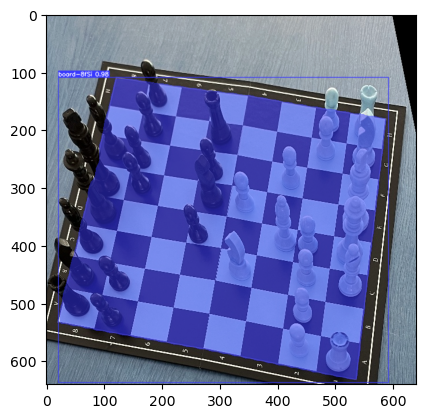

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


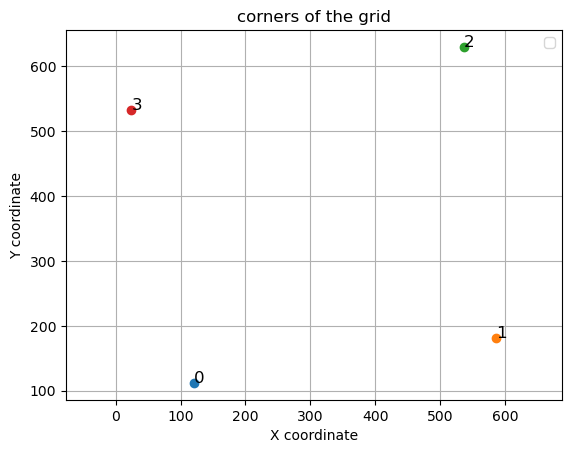

In [2]:
corners_model = YOLO('models/segment_grid.pt')
img_path = 'images/test_images/img_2.jpg'
img_path = 'images/warped_image.jpg'

image = cv2.imread(img_path)

results = grid.predict_grid_segmentation(corners_model, image)
print(results)
corners = grid.get_corners_from_grid_segmentation(results)
print(corners)
test_image = results[0].plot(line_width=1, font_size=12)
plt.imshow(test_image)
plt.show()

for (i,point) in enumerate(corners):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i), fontsize=12)
    
plt.title('corners of the grid')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling of x and y axes
plt.show()


In [3]:
warped_image, transfo = grid.make_perspective_transform(image, corners)
# cv2.imshow('Warped Image', warped_image)
# # cv2.imwrite('images/warped_image.jpg', warped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

GRID

In [4]:
def draw_grid(image, grid_size=(8, 8)):
    
    h, w = image.shape[:2]
    dx, dy = w / grid_size[0], h / grid_size[1]
    
    # Draw vertical lines
    for x in np.arange(dx, w, dx):
        cv2.line(image, (int(x), 0), (int(x), h), (0, 255, 0), 2)
        
    # Draw horizontal lines
    for y in np.arange(dy, h, dy):
        cv2.line(image, (0, int(y)), (w, int(y)), (0, 255, 0), 2)
        
    return image

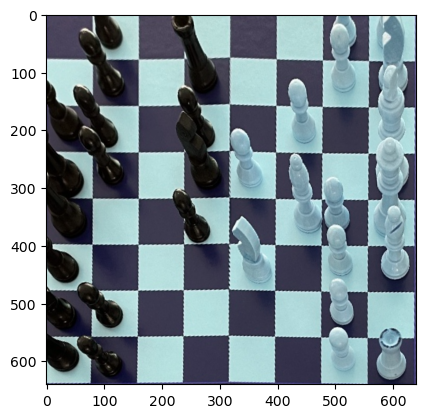

In [5]:
# grid_image = draw_grid(warped_image)
plt.imshow(warped_image)
plt.show()

GRID ORIENTATION

Rotation needed: False


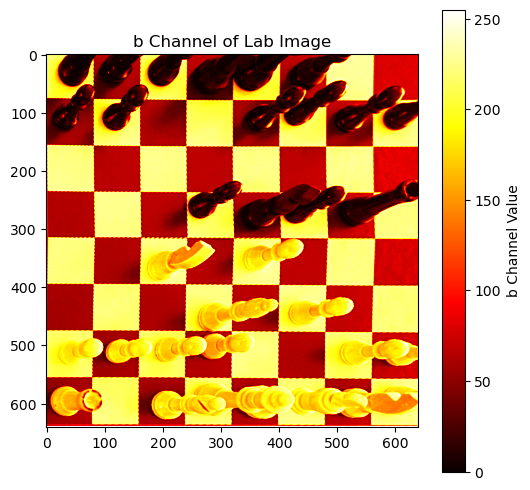

In [6]:
warped_image, transformation = grid.make_perspective_transform(image, corners)  

# rotate 90 degrees
warped_image = cv2.rotate(warped_image, cv2.ROTATE_90_CLOCKWISE)

# rotate 180 degrees
# warped_image = cv2.rotate(warped_image, cv2.ROTATE_180)

# plot the rotated image
# cv2.imshow('Rotated Image', warped_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


need_rotation = grid.correct_orientation_advanced(warped_image)
print("Rotation needed:", need_rotation)

img_lab = cv2.cvtColor(warped_image, cv2.COLOR_BGR2Lab)


# Split into channels
L, a, b = cv2.split(img_lab)

# Plotting the 'a' channel which might help differentiate red tones
plt.figure(figsize=(6, 6))
plt.imshow(L, cmap='hot')
plt.colorbar(label='b Channel Value')
plt.title('b Channel of Lab Image')
plt.show()
    

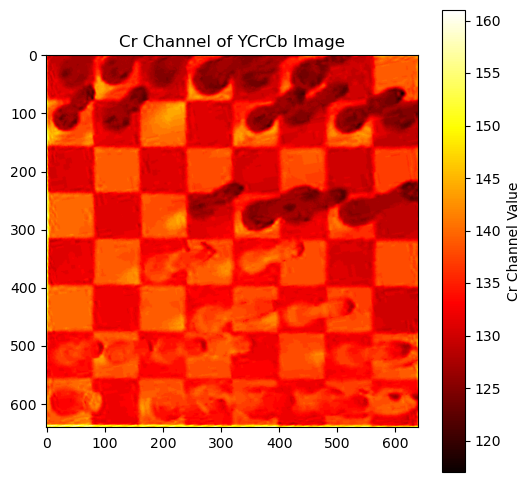

In [7]:
# Convert image from BGR to YCrCb
img_ycrcb = cv2.cvtColor(warped_image, cv2.COLOR_BGR2YCrCb)

# Extract Cr channel
Y, Cr, Cb = cv2.split(img_ycrcb)

# Plotting the Cr channel to emphasize red tones
plt.figure(figsize=(6, 6))
plt.imshow(Cr, cmap='hot')
plt.colorbar(label='Cr Channel Value')
plt.title('Cr Channel of YCrCb Image')
plt.show()

tiles:  {'A8': [(0, 0), (80, 80)], 'B8': [(80, 0), (160, 80)], 'C8': [(160, 0), (240, 80)], 'D8': [(240, 0), (320, 80)], 'E8': [(320, 0), (400, 80)], 'F8': [(400, 0), (480, 80)], 'G8': [(480, 0), (560, 80)], 'H8': [(560, 0), (640, 80)], 'A7': [(0, 80), (80, 160)], 'B7': [(80, 80), (160, 160)], 'C7': [(160, 80), (240, 160)], 'D7': [(240, 80), (320, 160)], 'E7': [(320, 80), (400, 160)], 'F7': [(400, 80), (480, 160)], 'G7': [(480, 80), (560, 160)], 'H7': [(560, 80), (640, 160)], 'A6': [(0, 160), (80, 240)], 'B6': [(80, 160), (160, 240)], 'C6': [(160, 160), (240, 240)], 'D6': [(240, 160), (320, 240)], 'E6': [(320, 160), (400, 240)], 'F6': [(400, 160), (480, 240)], 'G6': [(480, 160), (560, 240)], 'H6': [(560, 160), (640, 240)], 'A5': [(0, 240), (80, 320)], 'B5': [(80, 240), (160, 320)], 'C5': [(160, 240), (240, 320)], 'D5': [(240, 240), (320, 320)], 'E5': [(320, 240), (400, 320)], 'F5': [(400, 240), (480, 320)], 'G5': [(480, 240), (560, 320)], 'H5': [(560, 240), (640, 320)], 'A4': [(0, 320)

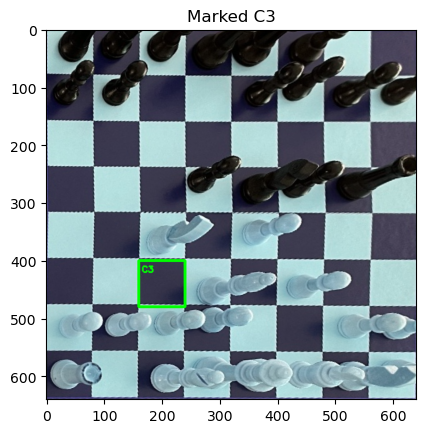

In [8]:
labels = grid.map_grid_to_coordinates(warped_image)
# print(labels)

# Mark A1 on the image
tile = 'C3'
a1 = labels[tile]
print("tiles: ", labels)
c1, c2 = a1
cv2.rectangle(warped_image, c1, c2, (0, 255, 0), 3)

cv2.putText(warped_image, tile, (c1[0]+5, c1[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(warped_image)
plt.title(f"Marked {tile}")
plt.show()


## Test finding the bottom center of the bounding box


In [9]:
dummy_boxes = [
    [121, 111, 2, 2, [0.7, 0.2, 0.1]],  
    [587, 181, 2, 2, [0.3, 0.6, 0.1]],  
]

print(pieces.get_center_bottom_bb(transfo, dummy_boxes))

[[        122         113]]
[[        588         183]]
[[(1.7019604, 1.3822756), 'b'], [(640.5798, 2.8788354), 'k']]
